<a href="https://colab.research.google.com/github/gustavogrds/TIC/blob/master/T5_plots_lab_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">T5 Lab plots</font></h1>
<hr>

# Basic imports



In [13]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import warnings
warnings.filterwarnings("ignore") 



# Tips

Empregue a base de dados à seguir para os exercícios.

In [8]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Exercício 0.
**Make e FREE graph**.

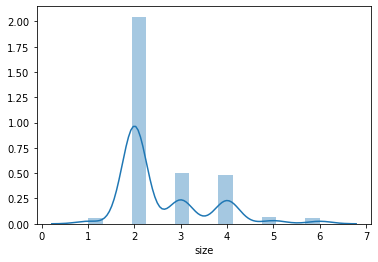

In [20]:
sns.distplot(df['size'])

# Exercício 1.
Qual a distribuição das gorjetas? Elas seguem a mesma distribuição do valor das contas (`total_bill`)?



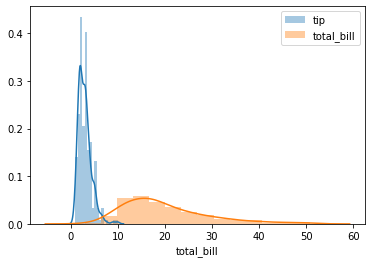

In [21]:
sns.distplot(df.tip,label='tip')
sns.distplot(df.total_bill,label='total_bill')
plt.legend()
plt.show()

# Exercício 2.
Compare os valores de gorjeta pagos por homens e mulheres. Quem normalmente paga mais gorjetas?

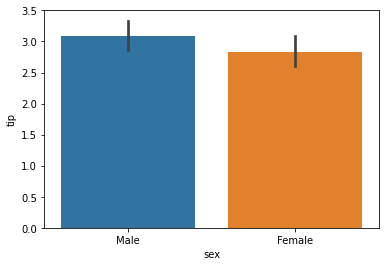

In [22]:
sns.barplot(df.sex,df.tip)
plt.show()

# Exercício 3.
Compare os valores de gorjeta pagos no almoço e no jantar. Onde são pagas as maiores gorjetas?

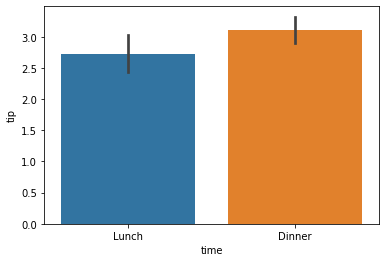

In [ ]:
sns.barplot(df.time,df.tip)
plt.show()

# Exercício 4.
Faça agora o mesmo gráfico anterior (um gráfico de barras `time` x `tip`) mas apresentando os valores divididos também pelo tamanho das mesas (empregue o parâmetro `hue`). Compare esse gráfico com o gráfico anterior. Você observa algo estranho? Este é o **paradoxo de Simpson**.

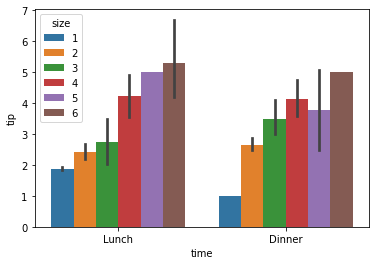

In [25]:
sns.barplot('time','tip',hue='size',data=df)
plt.show()

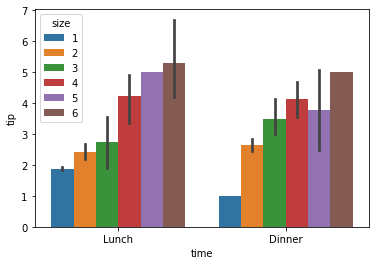

In [26]:
sns.barplot('time', 'tip',hue = 'size' ,data=df)
plt.show()

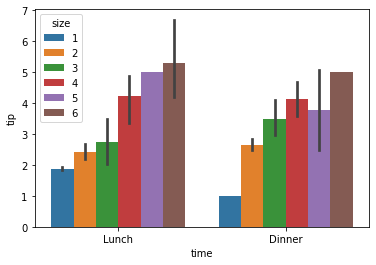

In [24]:
sns.barplot(df['time'],df['tip'],data=df,hue='size')
plt.show()

# Exercício 5
Empregue o gráfico `boxplot` para verificar *outliers* de tips no almoço e jantar (`time` x `tips`) para homens e mulheres (`hue`). Quando e quem paga valores extravagantes de gorjetas? 

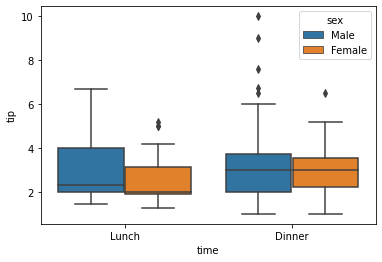

In [27]:
sns.boxplot('time','tip',data=df,hue='sex')
plt.show()

# Exercício 6
Empregue o gráfico `pairs` para identificar correlações entre os dados e empregue o gráfico `lmplot` para mostrar uma tendência dos dados mais linearmente relacionados.

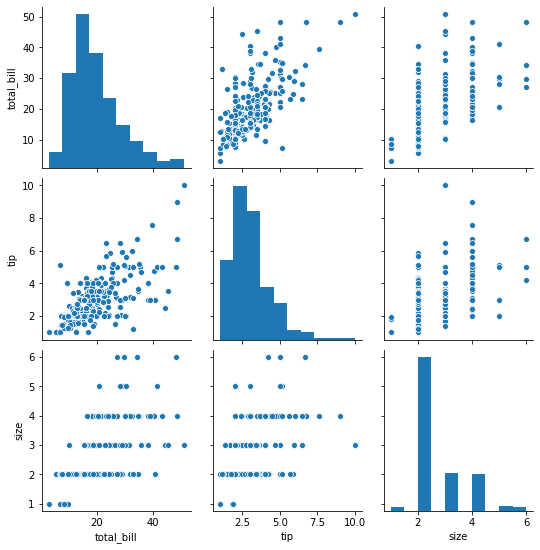

In [ ]:
sns.pairplot(df)
plt.show()

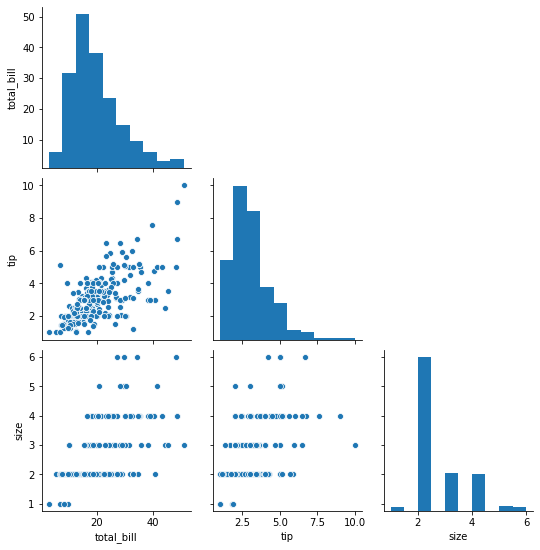

In [28]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.pairplot(df)
g.map_upper(hide_current_axis)

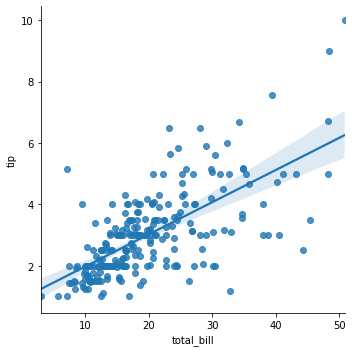

In [ ]:
# sns.lmplot(df.total_bill,df.tip) don't work!!!
sns.lmplot('total_bill','tip',data=df)  
plt.show()

# CASE: **Plantio de Árvores em USA São Francisco**

From https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-01-28/readme.md 


In [ ]:
sf_trees = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-28/sf_trees.csv')
sf_trees.head()

,tree_id,legal_status,species,address,site_order,site_info,caretaker,date,dbh,plot_size,latitude,longitude
0,53719,Permitted Site,Tree(s) ::,2963 Webster St,1.0,Sidewalk: Curb side : Cutout,Private,1955-09-19,NaN,NaN,37.797869,-122.434054
1,30313,Permitted Site,Tree(s) ::,501 Arkansas St,3.0,Sidewalk: Curb side : Cutout,Private,1955-10-20,NaN,NaN,37.759838,-122.398119
2,30312,Permitted Site,Tree(s) ::,501 Arkansas St,2.0,Sidewalk: Curb side : Cutout,Private,1955-10-20,NaN,NaN,37.759838,-122.398119
3,30314,DPW Maintained,Pittosporum undulatum :: Victorian Box,501 Arkansas St,1.0,Sidewalk: Curb side : Cutout,Private,1955-10-20,16.0,NaN,37.759772,-122.398109
4,30315,Permitted Site,Acacia melanoxylon :: Blackwood Acacia,1190 Sacramento St,5.0,Sidewalk: Curb side : Cutout,Private,1955-10-24,NaN,NaN,37.792650,-122.412449


## Preparação dos dados

In [ ]:
def valid_year(date):
    plantdate = str(date)
    try:
        ts = pd.to_datetime(date)
        return int(ts.year)
    except:
        return int(1900)
sf_trees["plantdate"] = sf_trees["date"].apply(valid_year)

# Exercício 7. **RESOLVIDO**
O número de árvores plantadas vem crescendo nas últimas décadas ou decrescendo? A partir de quando verificamos uma *reversão* da tendência. 

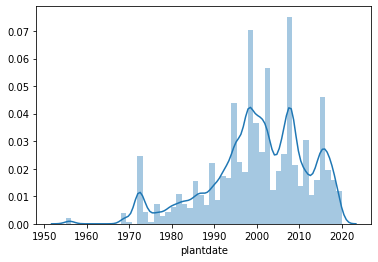

In [ ]:
sns.distplot(sf_trees[sf_trees['plantdate']>1900].plantdate)
plt.show()


# Exercício 8
Compare o plantio de árvores privadas e não privadas (`caretaker`) a partir de 2015. A iniciativa privada é responsável pela maior parte dos plantios ano a ano? Há reversão da tendência? Em que ano?  

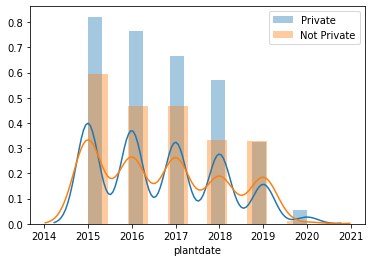

In [ ]:
sns.distplot(sf_trees[(sf_trees['plantdate']>=2015) & (sf_trees['caretaker'] == 'Private')].plantdate,label='Private')
sns.distplot(sf_trees[(sf_trees['plantdate']>=2015) & (sf_trees['caretaker'] != 'Private')].plantdate,label='Not Private')
plt.legend()
plt.show()


# CASE: **Vale a pena investir em Bitcoin**

Aqui você vai analisar a evolução de valores da criptomoeda Bitcoin.   

Empregue os dados da URL: https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv


In [ ]:
bitcoin = pd.read_csv('https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv',sep=' ',header=0)
bitcoin.head()

# Check True
len(bitcoin.columns) == 2 

True

## Preparação dos dados

In [ ]:
# Converta as datas
from datetime import datetime
bitcoin['date'] = bitcoin['date'].astype('datetime64[ns]')

## Exercício 9 (Moodle)

1. Como evoluem os valores da moeda?
1. Qual aproximadamente o maior e menor valor da moeda a partir de dezembro de 2017 ('2017-12-01')?
1. Considerando somente os valores mais frequentes da moeda nos últimos 5 anos (considere a partir de dezembro de 2013) que valor você consideraria um bom valor para investir em bitcoin? (dica: `plt.xlim(0,10000)` para limitar os valores exibidos no eixo).

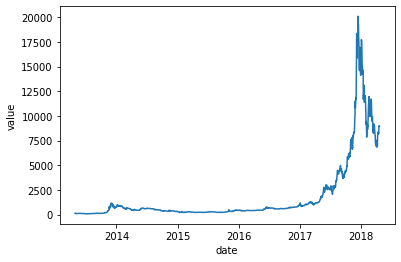

In [ ]:
sns.lineplot('date', 'value', data=bitcoin)
plt.show()

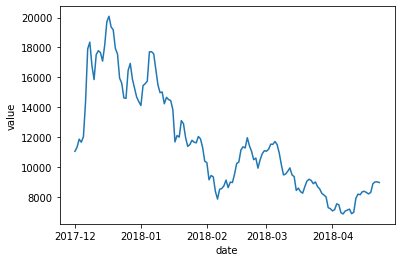

In [ ]:
sns.lineplot('date', 'value', data=bitcoin[bitcoin['date'] >= '2017-12-01'])
plt.show()

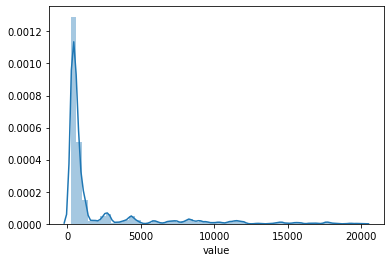

In [ ]:
sns.distplot(bitcoin[bitcoin['date'] >= '2013-12-01'].value,kde=True) 
plt.show()

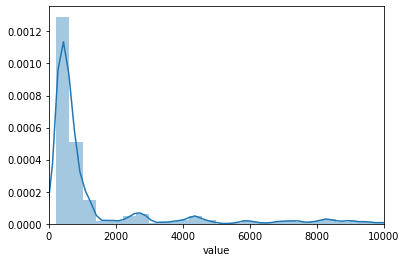

In [ ]:
sns.distplot(bitcoin[bitcoin['date'] >= '2013-12-01'].value,kde=True) 
plt.xlim(0,10000)
plt.show()